In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import bz2

In [2]:
sns.set(rc={'figure.figsize':(10.5,6.8)})

In [3]:
def create_pitch(length, width, linecolor):

    """
    mainly stolen from fc python
    param length: an int the length of the field
    param width: an int the height of the field
    param linecolor: the color of the lines
"""
    #Create figure
    fig=plt.figure()
    #fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,width], color=linecolor)
    plt.plot([0,length],[width,width], color=linecolor)
    plt.plot([length,length],[width,0], color=linecolor)
    plt.plot([length,0],[0,0], color=linecolor)
    plt.plot([length/2,length/2],[0,width], color=linecolor)
    plt.fill_between([0, length], [width, width], color='green')

    #Left Penalty Area
    plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
    plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
    plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)

    #Right Penalty Area
    plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
    plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
    plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)

    #Left 5-meters Box
    plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
    plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
    plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)

    #Right 5-meters Box
    plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
    plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
    plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)

    #Prepare Circles
    centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
    centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
    leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
    rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
    rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
            #Axis titles
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

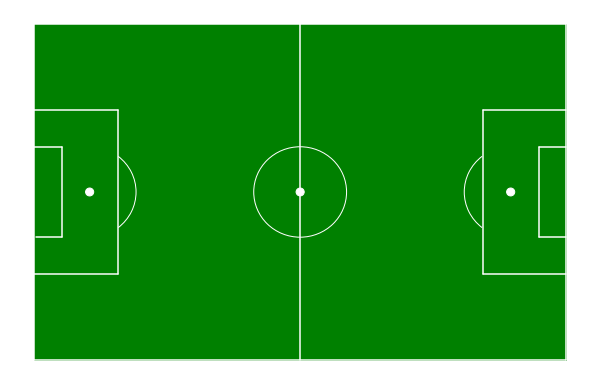

In [4]:
fig, ax = create_pitch(105, 68, 'white')

In [5]:
ax.plot()
plt.show()

In [6]:
match_results = pd.read_csv("../input/euro-cup-2020/eurocup_2020_results.csv")
#original dataset has whitespaces, so annoying
match_results[['team_name_home', 'team_name_away']] = match_results[['team_name_home', 'team_name_away']].applymap(lambda x: str.strip(x))

In [7]:
match_results.head(3)

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,events_list,lineup_home,lineup_away
0,Final,11.07.2021,True,3,2,Italy,England,1,1,66%,34%,19,6,6,2,53%,47%,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
1,Semi-finals,07.07.2021,False,False,False,England,Denmark,2,1,59%,41%,20,6,10,3,50%,50%,"[{'event_team': 'away', 'event_time': "" 30' "",...","[{'Player_Name': 'Kane', 'Player_Number': '9'}...","[{'Player_Name': 'Krogh Damsgaard', 'Player_Nu..."
2,Semi-finals,06.07.2021,True,4,2,Italy,Spain,1,1,29%,71%,7,16,4,5,49%,51%,"[{'event_team': 'away', 'event_time': "" 51' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Torres', 'Player_Number': '1..."


In [8]:
iw_mask = (match_results.team_name_home == "Italy") & (match_results.team_name_away == "Wales")
italy_wales = match_results[iw_mask]

### Some cool extra game data there it seems:

In [9]:
events = italy_wales.events_list.iloc[0]
#what shitty formatting it's list of dicts converted to a string..., maybe that's who also did the eigen docs
for event in eval(events):
    print(f"event {event} \n")

event {'event_team': 'home', 'event_time': " 39' ", 'event_type': 'Goal', 'action_player_1': ' Matteo Pessina ', 'action_player_2': ' Marco Verratti '} 

event {'event_team': 'home', 'event_time': " 45' ", 'event_type': 'Substitution', 'action_player_1': ' Francesco Acerbi ', 'action_player_2': ' Leonardo Bonucci '} 

event {'event_team': 'away', 'event_time': " 51' ", 'event_type': 'Yellow card', 'action_player_1': ' Joe Allen '} 

event {'event_team': 'away', 'event_time': " 55' ", 'event_type': 'Red card', 'action_player_1': ' Ethan Ampadu '} 

event {'event_team': 'away', 'event_time': " 60' ", 'event_type': 'Substitution', 'action_player_1': ' Kieffer Moore ', 'action_player_2': ' Joseff Morrell '} 

event {'event_team': 'away', 'event_time': " 74' ", 'event_type': 'Substitution', 'action_player_1': ' Harry Wilson ', 'action_player_2': ' Daniel James '} 

event {'event_team': 'home', 'event_time': " 75' ", 'event_type': 'Substitution', 'action_player_1': ' Bryan Cristante ', 'acti

In [10]:
italy_lineup = italy_wales.lineup_home.iloc[0]
for player in eval(italy_lineup):
    print(f"event {player} \n")

event {'Player_Name': 'Chiesa', 'Player_Number': '14'} 

event {'Player_Name': 'Belotti', 'Player_Number': '9'} 

event {'Player_Name': 'Bernardeschi', 'Player_Number': '20'} 

event {'Player_Name': 'Verratti', 'Player_Number': '6'} 

event {'Player_Name': 'Jorginho', 'Player_Number': '8'} 

event {'Player_Name': 'Pessina', 'Player_Number': '12'} 

event {'Player_Name': 'Emerson', 'Player_Number': '13'} 

event {'Player_Name': 'Bastoni', 'Player_Number': '23'} 

event {'Player_Name': 'Bonucci', 'Player_Number': '19'} 

event {'Player_Name': 'Tolói', 'Player_Number': '25'} 

event {'Player_Name': 'Donnarumma', 'Player_Number': '21'} 



In [11]:
italy_wales_matches = match_results['team_name_home'].isin(["Italy", "Wales"])
iw_matches = match_results[italy_wales_matches]

In [12]:
iw_matches

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,events_list,lineup_home,lineup_away
0,Final,11.07.2021,True,3,2,Italy,England,1,1,66%,34%,19,6,6,2,53%,47%,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
2,Semi-finals,06.07.2021,True,4,2,Italy,Spain,1,1,29%,71%,7,16,4,5,49%,51%,"[{'event_team': 'away', 'event_time': "" 51' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Torres', 'Player_Number': '1..."
13,Round of 16,26.06.2021,False,False,False,Italy,Austria,2,1,52%,48%,27,16,6,3,50%,50%,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Arnautovic', 'Player_Number'..."
14,Round of 16,26.06.2021,False,False,False,Wales,Denmark,0,4,47%,53%,11,16,1,8,39%,61%,"[{'event_team': 'home', 'event_time': "" 26' "",...","[{'Player_Name': 'Moore', 'Player_Number': '13...","[{'Player_Name': 'Dolberg', 'Player_Number': '..."
25,Group stage: Matchday 3,20.06.2021,False,False,False,Italy,Wales,1,0,70%,30%,23,3,6,1,56%,44%,"[{'event_team': 'home', 'event_time': "" 39' "",...","[{'Player_Name': 'Chiesa', 'Player_Number': '1...","[{'Player_Name': 'James', 'Player_Number': '20..."
36,Group stage: Matchday 2,16.06.2021,False,False,False,Italy,Switzerland,3,0,49%,51%,13,6,3,1,43%,57%,"[{'event_team': 'home', 'event_time': "" 19' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Embolo', 'Player_Number': '7..."
49,Group stage: Matchday 1,12.06.2021,False,False,False,Wales,Switzerland,1,1,35%,65%,9,18,2,4,46%,55%,"[{'event_team': 'away', 'event_time': "" 30' "",...","[{'Player_Name': 'Moore', 'Player_Number': '13...","[{'Player_Name': 'Embolo', 'Player_Number': '7..."


In [13]:
import json
with open('../input/socceranalytics/matches.json') as f:
    data = json.load(f)
    matches = pd.json_normalize(data, sep = "_")

In [14]:
matches.columns

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated', 'last_updated_360',
       'match_week', 'competition_competition_id', 'competition_country_name',
       'competition_competition_name', 'season_season_id',
       'season_season_name', 'home_team_home_team_id',
       'home_team_home_team_name', 'home_team_home_team_gender',
       'home_team_home_team_group', 'home_team_country_id',
       'home_team_country_name', 'home_team_managers',
       'away_team_away_team_id', 'away_team_away_team_name',
       'away_team_away_team_gender', 'away_team_away_team_group',
       'away_team_country_id', 'away_team_country_name', 'away_team_managers',
       'metadata_data_version', 'metadata_shot_fidelity_version',
       'metadata_xy_fidelity_version', 'competition_stage_id',
       'competition_stage_name', 'stadium_id', 'stadium_name',
       'stadium_country_id', 'stadium_country_name', 'referee_id',
       're

In [15]:
our_match = matches[matches.match_id == 2024468] # would've been too nice
our_match

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name


In [16]:
mask = (matches["home_team_home_team_name"] == "Italy") | (matches["away_team_away_team_name"] == "Italy")
italy_matches = matches[mask]

In [17]:
match_id = italy_matches[italy_matches["away_team_away_team_name"] == "Wales"].match_id.iloc[0]

In [18]:
match_id

3788766

In [19]:
import bz2
zipfile = bz2.BZ2File(f"../input/socceranalytics/three-sixty/three-sixty/{match_id}.json.bz2")
file = zipfile.read()
open(f"{match_id}.json", 'wb').write(file)
with open(f"{match_id}.json") as f:
    threesixty = json.load(f)
    match_events360 = pd.json_normalize(threesixty)


In [20]:
zipfile = bz2.BZ2File(f"../input/socceranalytics/events/events/{match_id}.json.bz2")
file = zipfile.read()
open(f"{match_id}.json", 'wb').write(file)
with open(f"{match_id}.json") as f:
    events = json.load(f)
    match_events = pd.json_normalize(events, sep = "_")

In [21]:
shots = match_events[match_events['type_name'] == 'Shot']
passes = match_events[match_events['type_name'] == 'Pass']

In [22]:
max_x = 0
max_y = 0
for frame in match_events360.freeze_frame:
    for player in frame:
        if max_x < player['location'][0]:
            max_x = player['location'][0]
        if max_y < player['location'][1]:
            max_y = player['location'][1]

In [23]:
shots = shots.reset_index(drop = True)
x, y= shots['location'][0]

In [24]:
shots['location']

0     [115.6, 43.6]
1      [91.2, 26.2]
2      [97.3, 51.8]
3     [105.7, 40.9]
4     [112.6, 51.6]
5     [110.7, 34.4]
6     [103.3, 24.9]
7     [115.9, 50.9]
8     [108.2, 29.7]
9      [96.1, 29.6]
10    [109.4, 45.1]
11    [109.7, 36.2]
12     [90.4, 44.8]
13    [111.7, 58.8]
14    [103.6, 56.4]
15    [112.6, 48.3]
16    [116.2, 51.5]
17     [98.5, 56.7]
18    [109.6, 47.6]
19    [110.1, 45.7]
20    [113.8, 54.6]
21    [110.4, 24.4]
22     [95.9, 32.3]
23    [101.5, 32.5]
24    [101.9, 42.2]
25     [93.7, 53.3]
Name: location, dtype: object

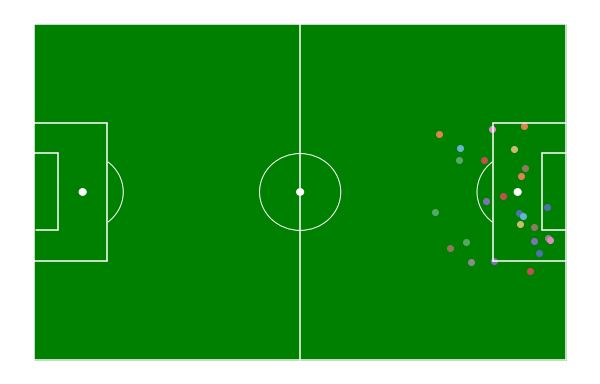

In [25]:
fig, ax = create_pitch(120, 80,'white')
for shot in shots['location']:
    x, y = shot
    y = 80 - y
    plt.scatter(x,y, marker = 'o')
    #shotCircle = plt.Circle((x,y) , 2, color="red")     
    #ax.add_patch(shotCircle)

plt.show()

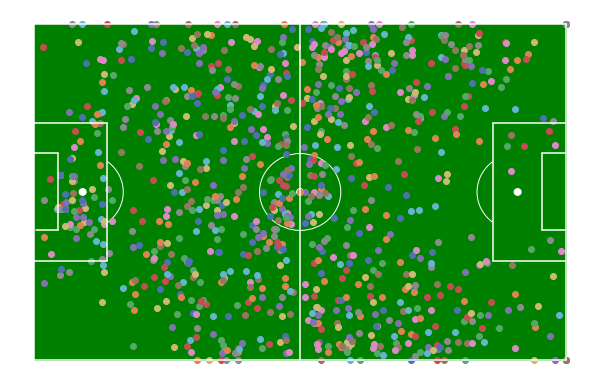

In [26]:
fig, ax = create_pitch(120, 80,'white')
for pass_ball in passes['location']:
    x, y = pass_ball
    y = 80 - y
    plt.scatter(x,y, marker = 'o')
    #shotCircle = plt.Circle((x,y) , 2, color="red")     
    #ax.add_patch(shotCircle)

plt.show()

x: 35.69931, y: 39.34204
x: 36.200874, y: 14.901566000000003
x: 39.276855, y: 58.619656
x: 43.21889, y: 43.58631
x: 46.322346, y: 41.87836
x: 49.805428, y: 41.016613
x: 52.023182, y: 72.816912
x: 52.329487, y: 44.94696
x: 52.95706, y: 26.233919999999998
x: 59.988873, y: 26.470318
x: 60.065403, y: 47.9683
x: 62.428272, y: 33.157387
x: 64.82069, y: 57.061935
x: 65.82369, y: 2.1536899999999974
x: 66.35554, y: 61.36174
x: 68.555466, y: 40.356163
x: 71.11175, y: 57.47321


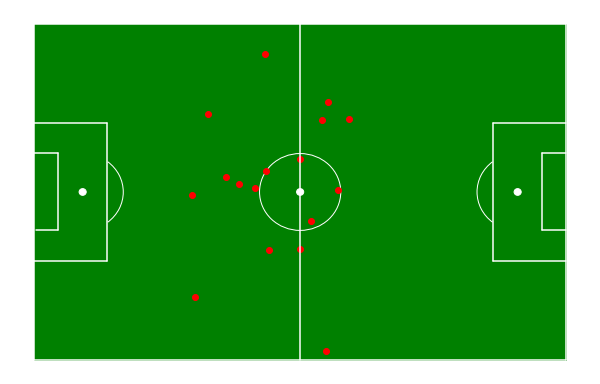

In [27]:
fig, ax = create_pitch(120, 80,'white')
for d in match_events360['freeze_frame'][4]:
    x, y = d['location']
    y = 80 - y
    print(f"x: {x}, y: {y}")
    plt.scatter(x, y, color = 'red', marker = 'o')
plt.show()

In [28]:
game = pd.read_parquet("../input/socceranalytics/italywales.pq")

In [29]:
game.player1_id.unique()

array(['102221', '250012939', '250101045', '250065196', '107011',
       '250090398', '250061597', '250050378', '250097244', '250067749',
       '250091199', '250097090', '250017925', '250078922', None,
       '250112488', '103769', '102225', '250100056', '250113272'],
      dtype=object)

In [30]:
for column in game.columns:
    if "250121401" in game[column].to_list():
        print(column)

player2_id
player3_id
player4_id
player5_id
player6_id
player7_id
player8_id
player9_id
player10_id
player11_id
player12_id
player13_id
player14_id
player15_id
player16_id
player17_id
player18_id
player19_id
player21_id
player22_id


In [31]:
with open(f"../input/socceranalytics/lineups/lineups/{match_id}.json") as f:
    lineup = json.load(f)
    lineups = pd.json_normalize(data)


In [32]:
wales_lineup = lineup[0]
italy_lineup = lineup[1]

In [33]:
for player in italy_lineup['lineup']:
    print(f"{player['player_name']}")

Marco Verratti
Emerson Palmieri dos Santos
Alex Meret
Bryan Cristante
Rafael Tolói
Jorge Luiz Frello Filho
Gianluigi Donnarumma
Lorenzo Insigne
Manuel Locatelli
Francesco Acerbi
Federico Chiesa
Leonardo Bonucci
Salvatore Sirigu
Andrea Belotti
Alessandro Bastoni
Federico Bernardeschi
Ciro Immobile
Nicolò Barella
Leonardo Spinazzola
Giovanni Di Lorenzo
Matteo Pessina
Giacomo Raspadori
Gaetano Castrovilli


In [34]:
len(wales_lineup['lineup'])

23